# LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import xgboost as xgb
import statsmodels.api as sm

from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import chi2
#from sklearn.feature_selection import SelectKBest
from sklearn import  svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error ,ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics  import f1_score,accuracy_score
from statsmodels.formula.api import ols
#import needed liberary 
#syntax of importing is ----> import (library name) as (refrence name)
%matplotlib inline

In [2]:
data = pd.read_csv('Heart_Disease.csv')

# Data Collections

In [3]:
data.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


In [4]:
data.tail()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
265,266,52.0,Female,3,172,199,1,0,162,0,0.5,1,0,7,NaN,smokes,No
266,267,44.0,Female,2,120,263,0,0,173,0,0.0,1,0,7,Private,never smoked,No
267,268,56.0,Male,2,140,294,0,2,153,0,1.3,2,0,3,Govt_job,smokes,No
268,269,57.0,Female,4,140,192,0,0,148,0,0.4,2,0,6,Self-employed,smokes,No
269,270,67.0,Female,4,160,286,0,2,108,1,1.5,2,3,3,Private,Unknown,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [6]:
data.shape

(270, 17)

In [7]:
data.describe()

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,264.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,135.500000,54.424242,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,78.086491,9.183488,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,1.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,68.250000,47.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,135.500000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,202.750000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,270.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
data.columns

Index(['id', 'Age', 'Gender', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'work_type', 'smoking_status', 'Heart Disease'],
      dtype='object')

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Length: 270, dtype: bool

In [10]:
sum(data.duplicated())

0

In [11]:
print (data.isnull().sum())

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64



# VISUALIZATION

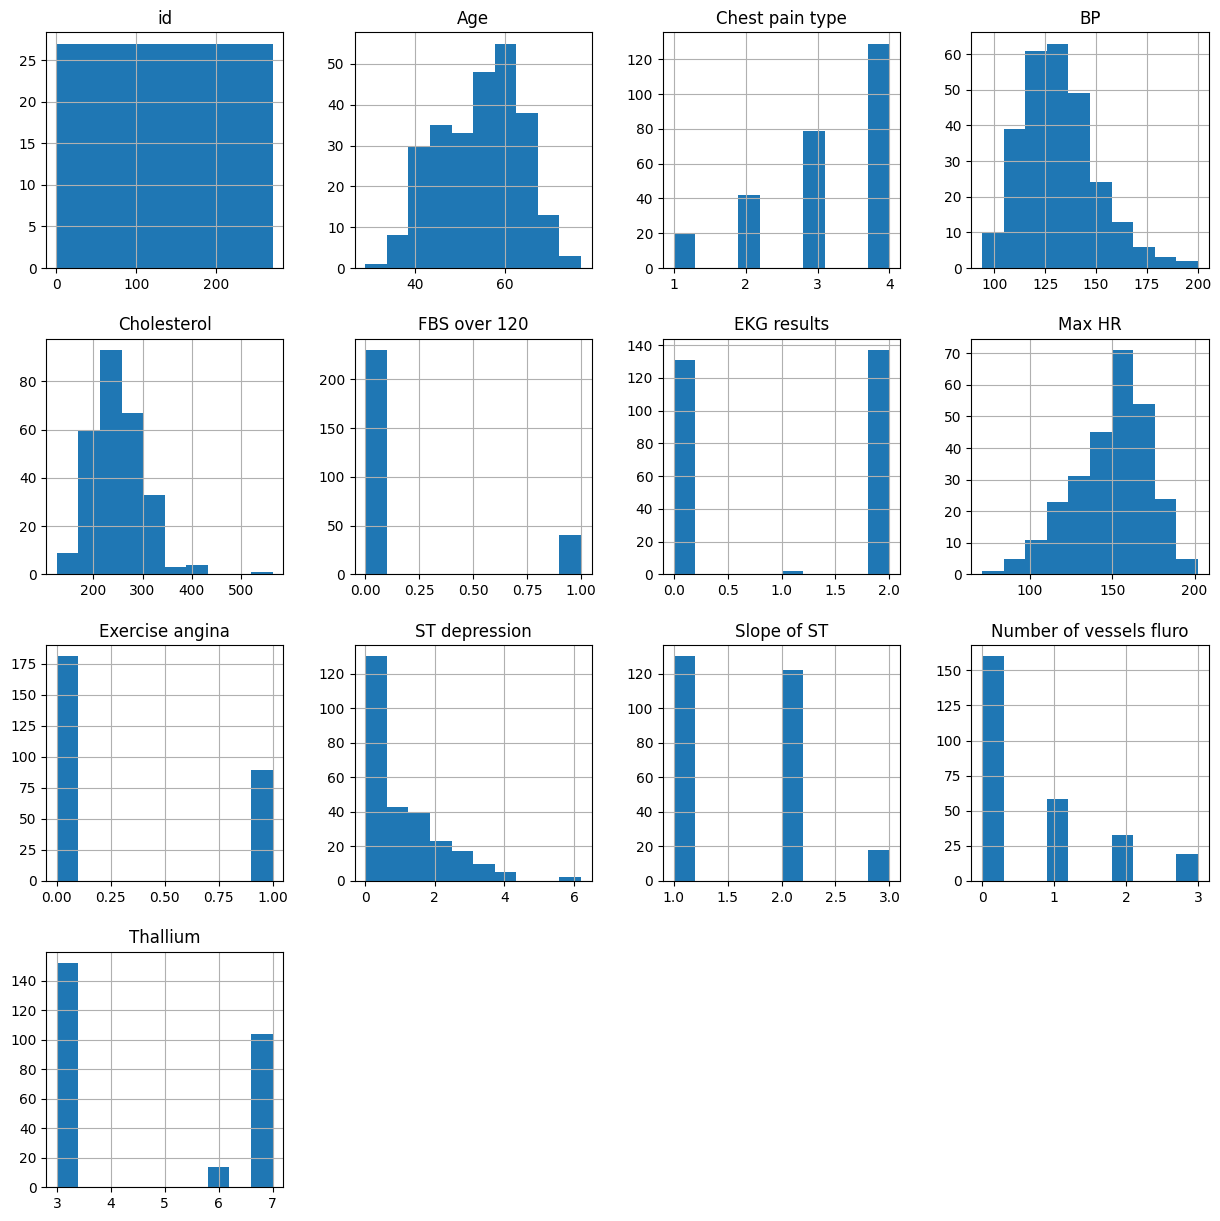

In [12]:
data.hist(figsize=(15,15))
plt.show()

<Axes: xlabel='Heart Disease', ylabel='count'>

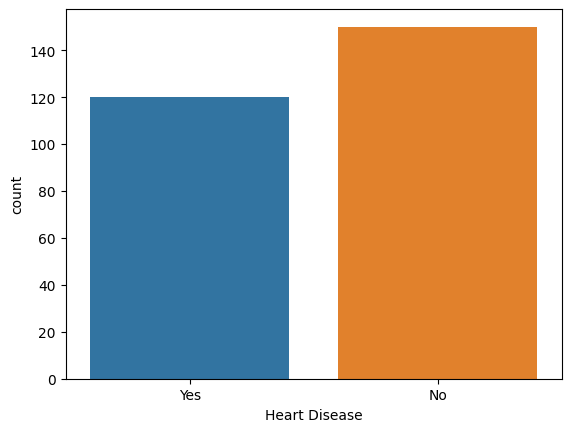

In [13]:
sns.countplot(x="Heart Disease",data=data)

<Axes: xlabel='smoking_status', ylabel='count'>

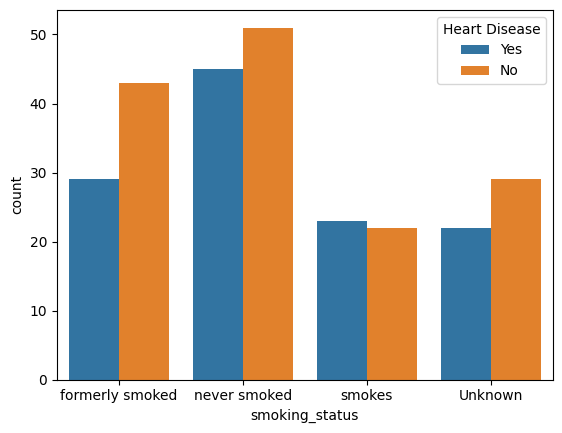

In [14]:
sns.countplot(x='smoking_status',hue='Heart Disease',data=data)

<Axes: xlabel='Chest pain type', ylabel='count'>

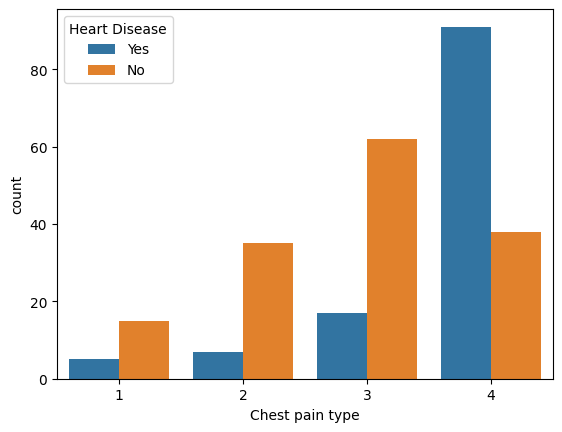

In [15]:
sns.countplot(x='Chest pain type',hue='Heart Disease',data=data)

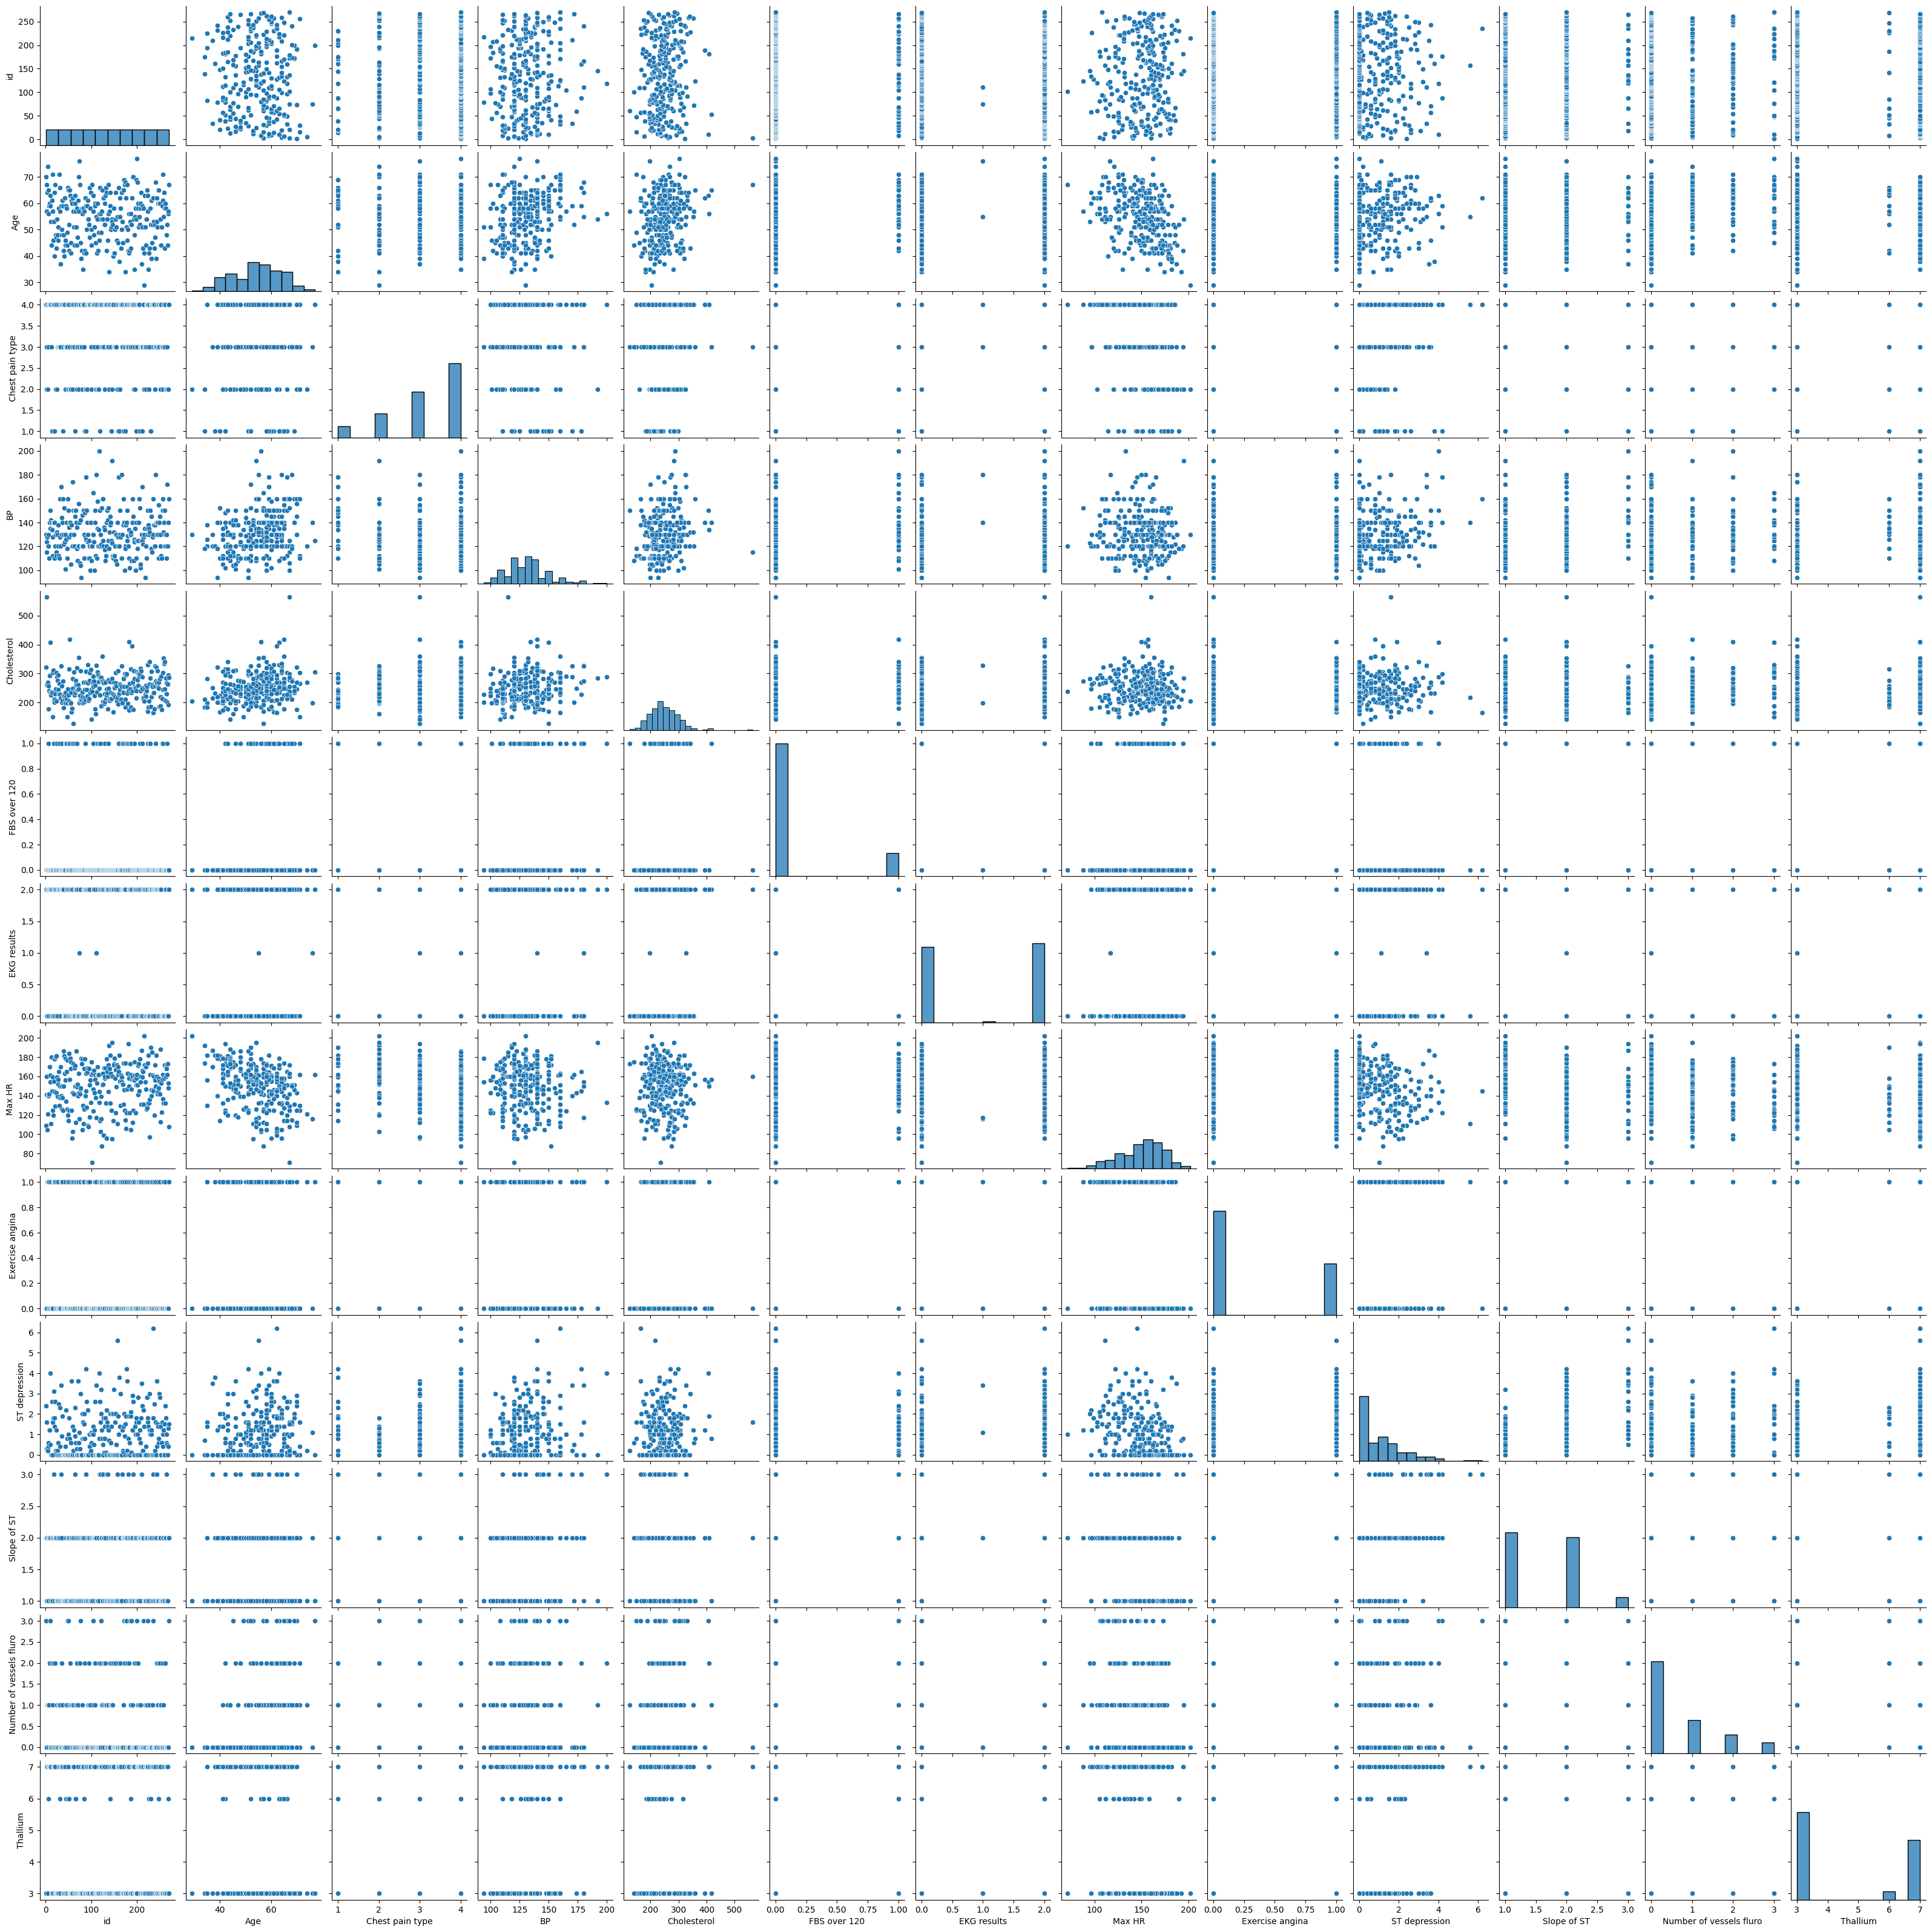

In [16]:
sns.pairplot(data)

<Axes: xlabel='Gender', ylabel='count'>

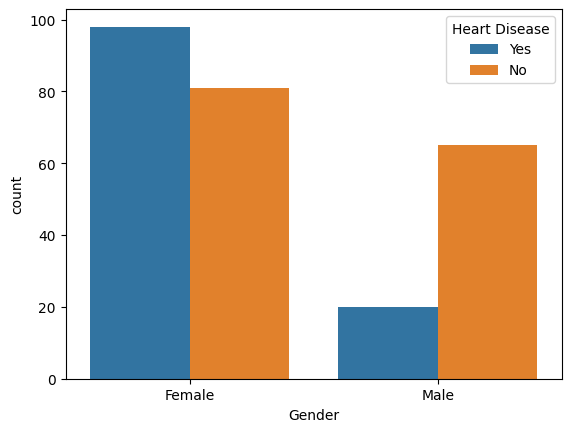

In [17]:
sns.countplot(x="Gender",data=data ,hue="Heart Disease" )

<Axes: >

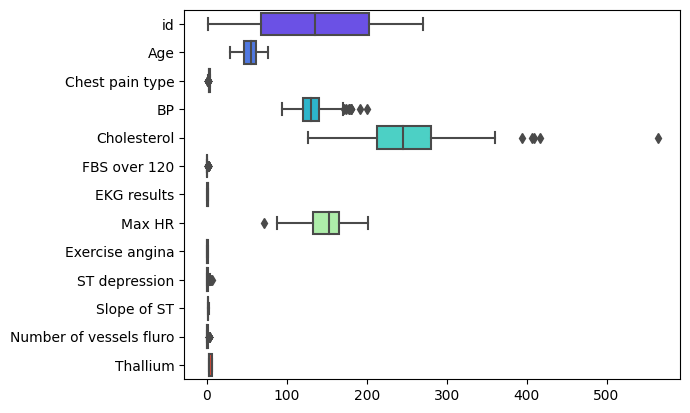

In [18]:
sns.boxplot(data=data,palette='rainbow',orient='h')


# CLEANING

In [19]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
print (data.isnull().sum()) 

id                         0
Age                        0
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64


In [20]:
data['Gender'].fillna(data['Gender'].value_counts().idxmax(), inplace=True)
print (data.isnull().sum()) 

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64


In [21]:
data['smoking_status'].fillna(data['smoking_status'].mode()[0], inplace=True)
print (data.isnull().sum())

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             0
Heart Disease              0
dtype: int64


In [22]:
data['smoking_status'] = data['smoking_status'].replace('Unknown', data['smoking_status'].mode()[0])

In [23]:
data.head(20)

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No
5,6,65.0,Female,4,120,177,0,0,140,0,0.4,1,0,7,Private,formerly smoked,No
6,7,56.0,Female,3,130,256,1,2,142,1,0.6,2,1,6,Private,never smoked,Yes
7,8,59.0,Female,4,110,239,0,2,142,1,1.2,2,1,7,Private,never smoked,Yes
8,9,60.0,Female,4,140,293,0,2,170,0,1.2,2,2,7,Private,never smoked,Yes
9,10,63.0,Male,4,150,407,0,2,154,0,4.0,2,3,7,Private,never smoked,Yes


In [24]:
data['work_type'].fillna(data['work_type'].value_counts().idxmax(), inplace=True)
print (data.isnull().sum()) 

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
Heart Disease              0
dtype: int64


In [25]:
data["Gender"] = data["Gender"].apply(lambda x: 1 if x == 'Female' else 0)

In [26]:
data["Gender"].unique()

array([1, 0])

In [27]:
label_encoder = preprocessing.LabelEncoder()
data[ 'Heart Disease']= label_encoder.fit_transform(data[ 'Heart Disease'])

In [28]:
data['Heart Disease'].unique()

array([1, 0])

In [29]:
dic_smoke = {"never smoked": 0, "formerly smoked": 1, "smokes": 2}
data['smoking_status'] = data.smoking_status.map(dic_smoke)

In [30]:
sk_one = OneHotEncoder()
sk_one.fit(data.work_type.values.reshape(-1,1))

OneHotEncoder()

In [31]:
sk_one_val = sk_one.transform (data.work_type.values.reshape(-1,1)).toarray()
sk_one_val

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [32]:
cols = ["Never worked", "children", "Self-employed", "Private", "Govt job"]

one = pd.DataFrame(sk_one_val, columns=cols)
one

,Never worked,children,Self-employed,Private,Govt job
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
265,0.0,0.0,1.0,0.0,0.0
266,0.0,0.0,1.0,0.0,0.0
267,1.0,0.0,0.0,0.0,0.0
268,0.0,0.0,0.0,1.0,0.0


In [33]:
data= pd.concat([one,data], axis=1)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Never worked             270 non-null    float64
 1   children                 270 non-null    float64
 2   Self-employed            270 non-null    float64
 3   Private                  270 non-null    float64
 4   Govt job                 270 non-null    float64
 5   id                       270 non-null    int64  
 6   Age                      270 non-null    float64
 7   Gender                   270 non-null    int64  
 8   Chest pain type          270 non-null    int64  
 9   BP                       270 non-null    int64  
 10  Cholesterol              270 non-null    int64  
 11  FBS over 120             270 non-null    int64  
 12  EKG results              270 non-null    int64  
 13  Max HR                   270 non-null    int64  
 14  Exercise angina          2

In [35]:
data["Never worked"] = data ["Never worked"].astype (int)
data["children"] =data["children"].astype(int) 
data["Self-employed"]=data["Self-employed"].astype(int)
data["Private"] =data["Private"].astype(int)
data["Govt job"] = data["Govt job"].astype(int)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Never worked             270 non-null    int64  
 1   children                 270 non-null    int64  
 2   Self-employed            270 non-null    int64  
 3   Private                  270 non-null    int64  
 4   Govt job                 270 non-null    int64  
 5   id                       270 non-null    int64  
 6   Age                      270 non-null    float64
 7   Gender                   270 non-null    int64  
 8   Chest pain type          270 non-null    int64  
 9   BP                       270 non-null    int64  
 10  Cholesterol              270 non-null    int64  
 11  FBS over 120             270 non-null    int64  
 12  EKG results              270 non-null    int64  
 13  Max HR                   270 non-null    int64  
 14  Exercise angina          2

In [37]:
data = data.drop(['work_type'], axis= 1)

In [38]:
data["Age"] = data ["Age"].astype (int)
data["ST depression"] = data ["ST depression"].astype (int)
data["smoking_status"] = data ["smoking_status"].astype (int)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Never worked             270 non-null    int64
 1   children                 270 non-null    int64
 2   Self-employed            270 non-null    int64
 3   Private                  270 non-null    int64
 4   Govt job                 270 non-null    int64
 5   id                       270 non-null    int64
 6   Age                      270 non-null    int64
 7   Gender                   270 non-null    int64
 8   Chest pain type          270 non-null    int64
 9   BP                       270 non-null    int64
 10  Cholesterol              270 non-null    int64
 11  FBS over 120             270 non-null    int64
 12  EKG results              270 non-null    int64
 13  Max HR                   270 non-null    int64
 14  Exercise angina          270 non-null    int64
 15  ST dep

In [40]:
data.head()

,Never worked,children,Self-employed,Private,Govt job,id,Age,Gender,Chest pain type,BP,...,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,smoking_status,Heart Disease
0,0,0,1,0,0,1,70,1,4,130,...,0,2,109,0,2,2,3,3,1,1
1,0,0,0,1,0,2,67,0,3,115,...,0,2,160,0,1,2,0,7,0,0
2,0,0,1,0,0,3,57,1,2,124,...,0,0,141,0,0,1,0,7,0,1
3,0,0,1,0,0,4,64,1,4,128,...,0,0,105,1,0,2,1,7,2,0
4,0,0,0,1,0,5,74,0,2,120,...,0,2,121,1,0,1,1,3,0,0


In [41]:
Q1 = data[['Cholesterol', 'BP', 'Max HR']].quantile(0.25)
Q3 = data[['Cholesterol', 'BP', 'Max HR']].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[['Cholesterol', 'BP', 'Max HR']] < (Q1 - 1.5 * IQR)) | (data[['Cholesterol', 'BP', 'Max HR']] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

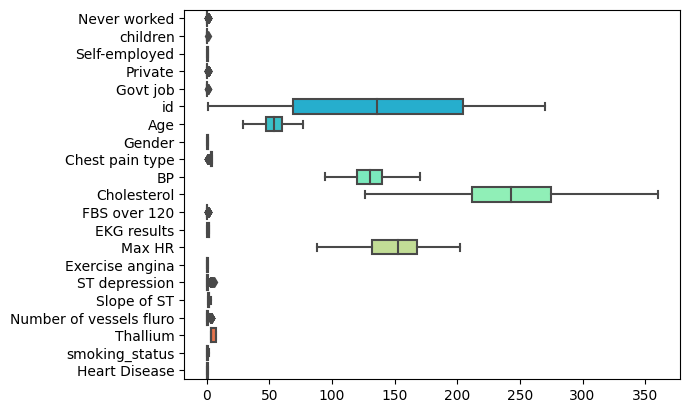

In [42]:
sns.boxplot(data=data,palette='rainbow',orient='h')

# FETURE SELECTION

In [43]:
data.head()

,Never worked,children,Self-employed,Private,Govt job,id,Age,Gender,Chest pain type,BP,...,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,smoking_status,Heart Disease
0,0,0,1,0,0,1,70,1,4,130,...,0,2,109,0,2,2,3,3,1,1
2,0,0,1,0,0,3,57,1,2,124,...,0,0,141,0,0,1,0,7,0,1
3,0,0,1,0,0,4,64,1,4,128,...,0,0,105,1,0,2,1,7,2,0
4,0,0,0,1,0,5,74,0,2,120,...,0,2,121,1,0,1,1,3,0,0
5,0,0,1,0,0,6,65,1,4,120,...,0,0,140,0,0,1,0,7,1,0


In [44]:
data.columns

Index(['Never worked', 'children', 'Self-employed', 'Private', 'Govt job',
       'id', 'Age', 'Gender', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'smoking_status', 'Heart Disease'],
      dtype='object')

# CORRELATION

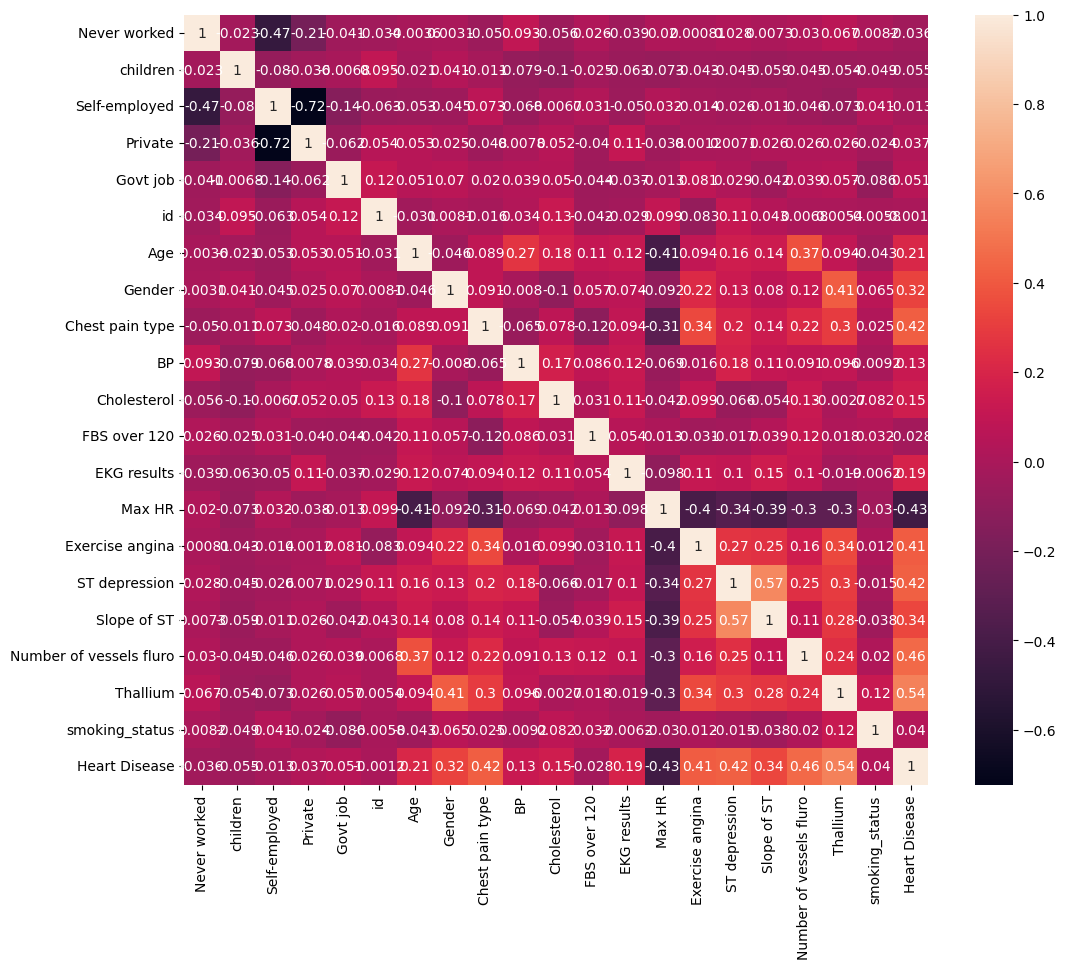

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

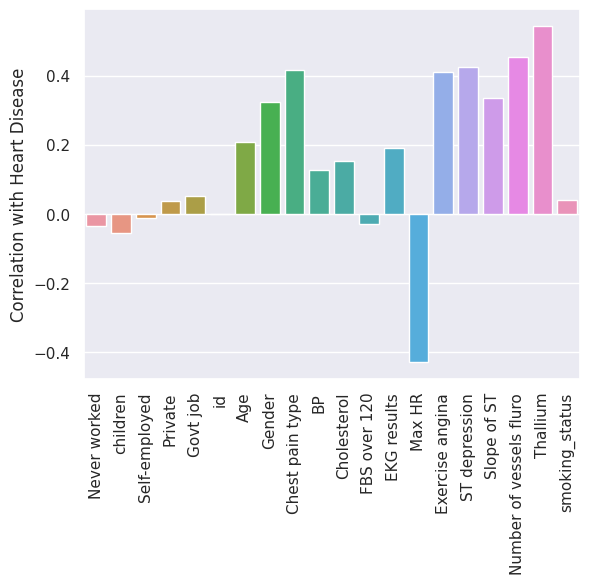

In [46]:
# Create an empty dictionary to store the correlation coefficients
correlations = {}

# Iterate over each feature in the DataFrame
for feature in data.columns:
    # Calculate the correlation coefficient with the specific feature
    if(feature!='Heart Disease'):
      corr = data[feature].corr(data['Heart Disease'])
      # Add the correlation coefficient to the dictionary
      correlations[feature] = corr

# Create a pandas DataFrame from the dictionary of correlation coefficients
correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Heart Disease'])

# Create a bar plot of the correlations
sns.set(style='darkgrid')
sns.barplot(x=correlations_df.index, y='Correlation with Heart Disease', data=correlations_df)
plt.xticks(rotation=90)
plt.show()

# INFORMATION GAIN

In [47]:
X=data.drop(['id', 'Heart Disease'], axis=1)
y=data['Heart Disease']

In [48]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:

importance = mutual_info_classif(X,y.values.ravel())
importance

array([0.        , 0.00017958, 0.01302408, 0.        , 0.        ,
       0.04950851, 0.06039251, 0.11274168, 0.01964807, 0.03014313,
       0.04779872, 0.00836799, 0.08462228, 0.06371051, 0.10153135,
       0.05395559, 0.12577671, 0.14523584, 0.        ])

In [50]:
feat_importance = pd.Series(importance, X.columns)
feat_importance.sort_values(ascending=False)

Thallium                   0.145236
Number of vessels fluro    0.125777
Chest pain type            0.112742
ST depression              0.101531
Max HR                     0.084622
Exercise angina            0.063711
Gender                     0.060393
Slope of ST                0.053956
Age                        0.049509
FBS over 120               0.047799
Cholesterol                0.030143
BP                         0.019648
Self-employed              0.013024
EKG results                0.008368
children                   0.000180
Never worked               0.000000
Govt job                   0.000000
Private                    0.000000
smoking_status             0.000000
dtype: float64

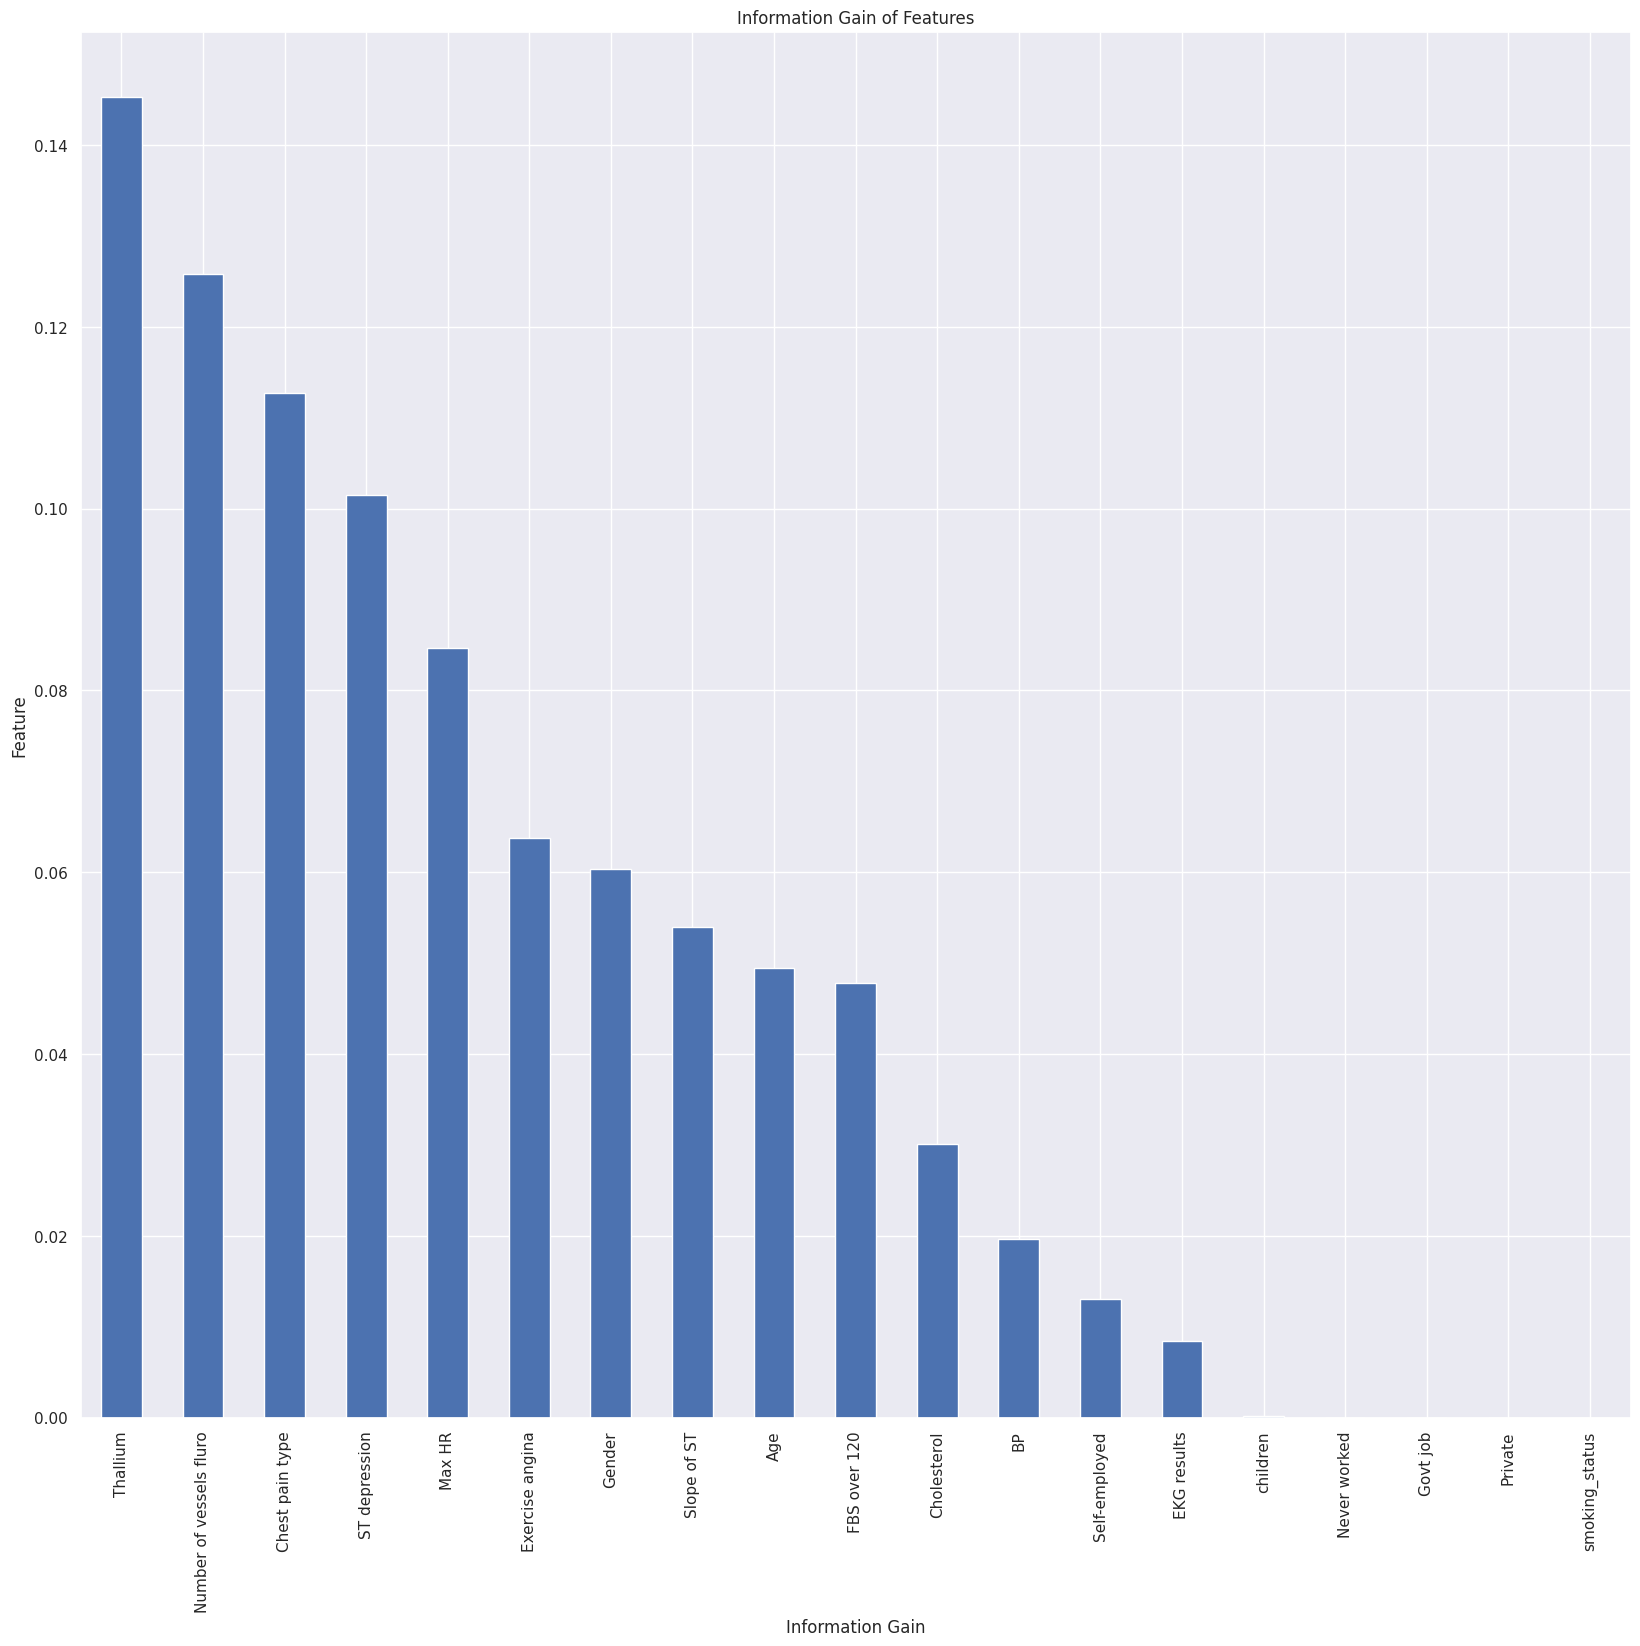

In [51]:
feat_importance.sort_values(ascending=False).plot.bar(figsize=(20,18))
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Information Gain of Features')
plt.show()

# LASSO

In [52]:
all_features =data.drop (['id','Heart Disease'],axis=1).values
target =data['Heart Disease'].values
lasso = Lasso(alpha=0.1)
lasso.fit(all_features, target)


Lasso(alpha=0.1)

In [53]:
n=data.columns.drop(['id','Heart Disease'])

In [54]:
coef=lasso.coef_
coef

array([-0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00107817,  0.00141229,
       -0.        ,  0.        , -0.00633945,  0.        ,  0.00791553,
        0.        ,  0.02570173,  0.08505243, -0.        ])

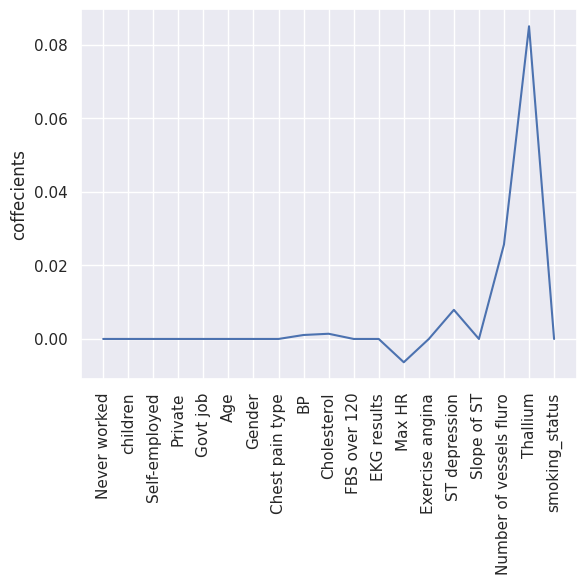

In [55]:
plt.plot(range(len(n)),coef)
plt.xticks(range(len(n)),n,rotation=90)

plt.ylabel('coffecients')
plt.show()

# CHI-SQUARED

In [56]:
chi_data =data.drop(['id', 'Heart Disease'], axis = 1)
ch = chi2(chi_data, data['Heart Disease']);
print(ch)


(array([2.92956263e-01, 7.70833333e-01, 1.55234348e-02, 2.65556888e-01,
       6.53340841e-01, 1.68450891e+01, 7.85856169e+00, 1.26955834e+01,
       7.52847918e+00, 4.72225059e+01, 1.77364865e-01, 9.21627099e+00,
       1.64603168e+02, 2.93091903e+01, 6.38611868e+01, 6.81306306e+00,
       6.97804054e+01, 5.99932622e+01, 3.93684803e-01]), array([5.88332286e-01, 3.79959377e-01, 9.00845709e-01, 6.06327944e-01,
       4.18920768e-01, 4.05581408e-05, 5.05806133e-03, 3.66520237e-04,
       6.07311535e-03, 6.33686434e-12, 6.73647683e-01, 2.39873625e-03,
       1.11685744e-37, 6.17023598e-08, 1.33502110e-15, 9.04934051e-03,
       6.62881232e-17, 9.51826584e-15, 5.30368844e-01]))


<Axes: >

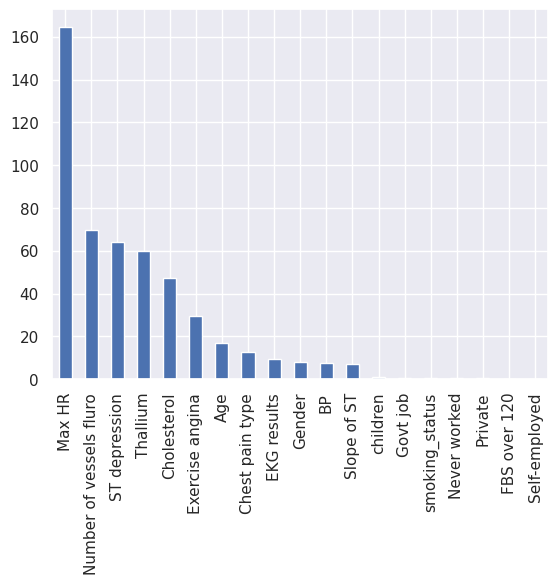

In [57]:
chi_plot = pd.Series(ch[0], index=chi_data.columns)
chi_plot.sort_values(ascending=False, inplace=True)
chi_plot.plot.bar()

# ANNOVA

In [58]:
model = ols('Thallium ~ smoking_status', data=data).fit()
sm.stats.anova_lm(model, typ=2)
#if p < 0.05, this means that the categorical variable has significant influence on the numerical variable
#if p > 0.05, this means that the categorical variable has no significant influence on the numerical variable


,sum_sq,df,F,PR(>F)
smoking_status,14.641217,1.0,3.970275,0.047385
Residual,932.990156,253.0,NaN,NaN


# SELECTED FETURE

In [59]:
from sklearn.feature_selection import SelectKBest
sel_cols = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
selected_features =['Private', 'Gender', 'Chest pain type', 'Max HR', 'Exercise angina','ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium','smoking_status']
print(selected_features)

['Private', 'Gender', 'Chest pain type', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'smoking_status']


# MODEL TRAINING 

In [248]:

lr = LogisticRegression()
lr.fit(X_train[selected_features] , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [249]:

DT = DecisionTreeClassifier()

DT.fit(X_train[selected_features], y_train)

DecisionTreeClassifier()

In [250]:


SV = svm.SVC(kernel='linear') 

SV.fit(X_train[selected_features], y_train)


SVC(kernel='linear')

In [251]:
rfc=RandomForestClassifier()
rfc.fit(X_train[selected_features], y_train)

RandomForestClassifier()

# EVALUATION

In [252]:

modelTestAccuracy = lr.score(X_test[selected_features], y_test)
print(modelTestAccuracy)

0.8431372549019608


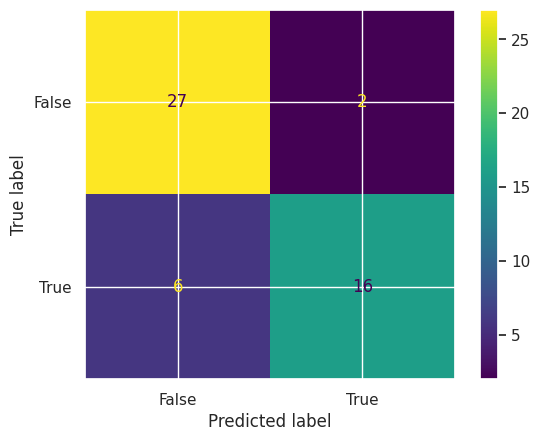

In [253]:

model_conf_matrix = confusion_matrix(y_test, lr.predict(X_test[selected_features]))
cm = ConfusionMatrixDisplay(confusion_matrix = model_conf_matrix, display_labels = [False, True])
cm.plot()
plt.show()

<Axes: >

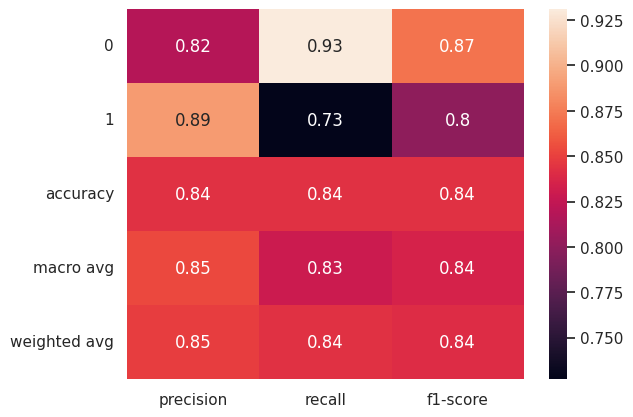

In [254]:
model_report = classification_report(y_test, lr.predict(X_test[selected_features]), output_dict=True)
sns.heatmap(pd.DataFrame(model_report).iloc[:-1, :].T, annot=True)

In [255]:
model_mse = mean_squared_error(y_test, lr.predict(X_test[selected_features]))
print(model_mse)

0.1568627450980392


In [256]:
modelTestAccuracy = DT.score(X_test[selected_features], y_test)
print(modelTestAccuracy)

0.803921568627451


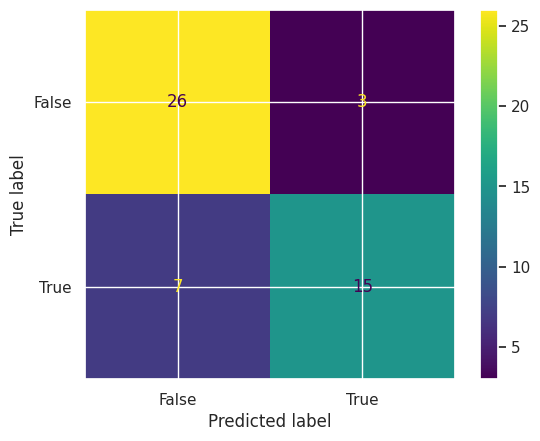

In [257]:

model_conf_matrix = confusion_matrix(y_test, DT.predict(X_test[selected_features]))
cm= ConfusionMatrixDisplay(confusion_matrix = model_conf_matrix, display_labels = [False, True])
cm.plot()
plt.show()

<Axes: >

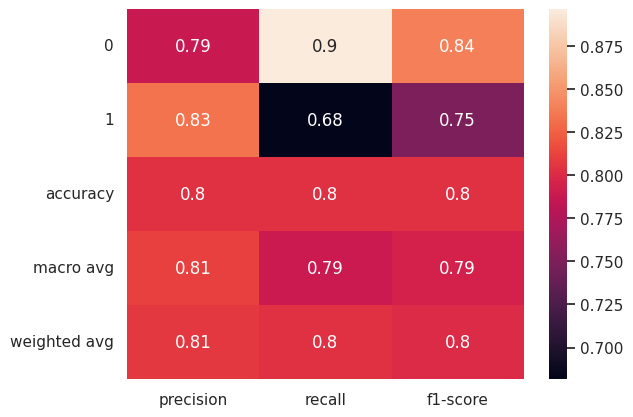

In [258]:
model_report = classification_report(y_test, DT.predict(X_test[selected_features]), output_dict=True)
sns.heatmap(pd.DataFrame(model_report).iloc[:-1, :].T, annot=True)

In [259]:
model_mse = mean_squared_error(y_test, DT.predict(X_test[selected_features]))
print(model_mse)

0.19607843137254902


In [260]:
modelTestAccuracy = rfc.score(X_test[selected_features], y_test)
print(modelTestAccuracy)

0.803921568627451


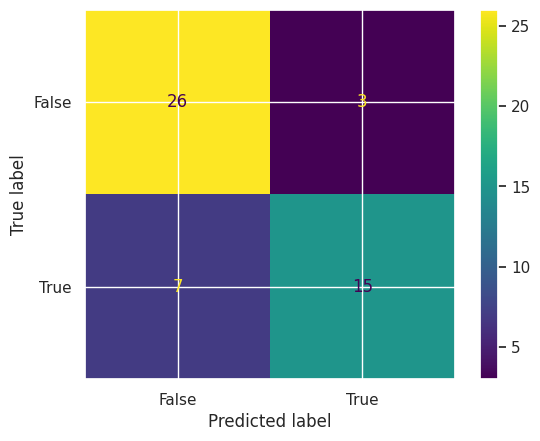

In [261]:
model_conf_matrix = confusion_matrix(y_test, rfc.predict(X_test[selected_features]))
cm= ConfusionMatrixDisplay(confusion_matrix = model_conf_matrix, display_labels = [False, True])
cm.plot()
plt.show()

<Axes: >

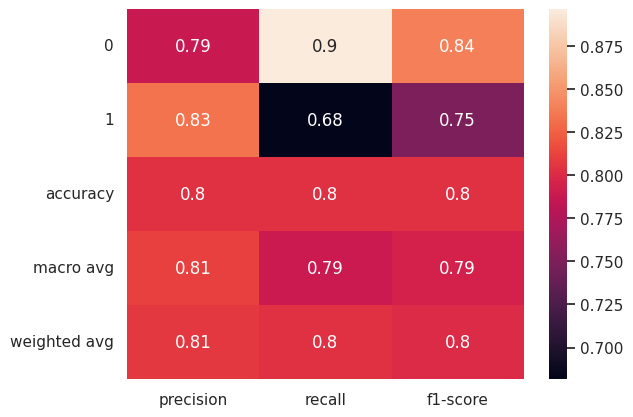

In [262]:
model_report = classification_report(y_test, rfc.predict(X_test[selected_features]), output_dict=True)
sns.heatmap(pd.DataFrame(model_report).iloc[:-1, :].T, annot=True)

In [263]:
model_mse = mean_squared_error(y_test, rfc.predict(X_test[selected_features]))
print(model_mse)

0.19607843137254902


In [264]:
modelTestAccuracy = SV.score(X_test[selected_features], y_test)
print(modelTestAccuracy)

0.8627450980392157


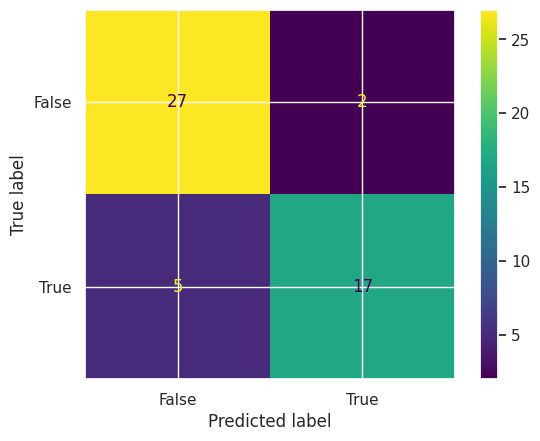

In [265]:

model_conf_matrix = confusion_matrix(y_test, SV.predict(X_test[selected_features]))
cm= ConfusionMatrixDisplay(confusion_matrix = model_conf_matrix, display_labels = [False, True])
cm.plot()
plt.show()

<Axes: >

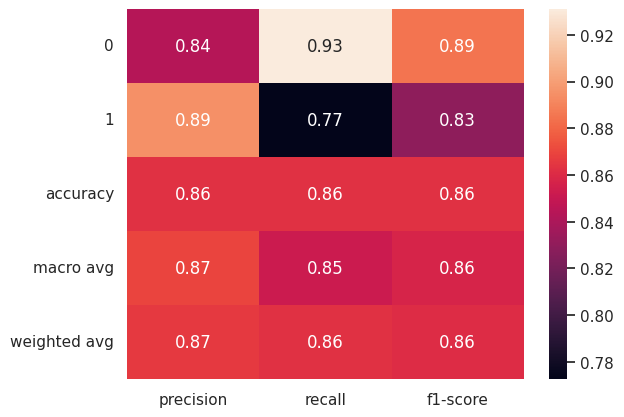

In [266]:
model_report = classification_report(y_test, SV.predict(X_test[selected_features]), output_dict=True)
sns.heatmap(pd.DataFrame(model_report).iloc[:-1, :].T, annot=True)

In [267]:
model_mse = mean_squared_error(y_test, SV.predict(X_test[selected_features]))
print(model_mse)

0.13725490196078433


In [268]:
data.head(10)

,Never worked,children,Self-employed,Private,Govt job,id,Age,Gender,Chest pain type,BP,...,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,smoking_status,Heart Disease
0,0,0,1,0,0,1,70,1,4,130,...,0,2,109,0,2,2,3,3,1,1
2,0,0,1,0,0,3,57,1,2,124,...,0,0,141,0,0,1,0,7,0,1
3,0,0,1,0,0,4,64,1,4,128,...,0,0,105,1,0,2,1,7,2,0
4,0,0,0,1,0,5,74,0,2,120,...,0,2,121,1,0,1,1,3,0,0
5,0,0,1,0,0,6,65,1,4,120,...,0,0,140,0,0,1,0,7,1,0
6,0,0,1,0,0,7,56,1,3,130,...,1,2,142,1,0,2,1,6,0,1
7,0,0,1,0,0,8,59,1,4,110,...,0,2,142,1,1,2,1,7,0,1
8,0,0,1,0,0,9,60,1,4,140,...,0,2,170,0,1,2,2,7,0,1
10,0,0,1,0,0,11,59,1,4,135,...,0,0,161,0,0,2,0,7,0,0
11,1,0,0,0,0,12,53,1,4,142,...,0,2,111,1,0,1,0,7,2,0


In [269]:
print(X_train[selected_features].shape)

(204, 10)


# Grid Search

In [271]:

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
}

In [272]:

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train[selected_features], y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [273]:
print("Best parameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)
best_params = grid_search.best_params_


Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy score: 0.8630487804878049


In [274]:

rfc_best = RandomForestClassifier(**best_params)

rfc_best.fit(X_train[selected_features], y_train)

y_pred = rfc_best.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#get classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

#get the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Accuracy: 0.8431372549019608
Confusion Matrix:
[[27  2]
 [ 6 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.89      0.73      0.80        22

    accuracy                           0.84        51
   macro avg       0.85      0.83      0.84        51
weighted avg       0.85      0.84      0.84        51

Mean Squared Error: 0.1568627450980392


In [275]:
data.head()

,Never worked,children,Self-employed,Private,Govt job,id,Age,Gender,Chest pain type,BP,...,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,smoking_status,Heart Disease
0,0,0,1,0,0,1,70,1,4,130,...,0,2,109,0,2,2,3,3,1,1
2,0,0,1,0,0,3,57,1,2,124,...,0,0,141,0,0,1,0,7,0,1
3,0,0,1,0,0,4,64,1,4,128,...,0,0,105,1,0,2,1,7,2,0
4,0,0,0,1,0,5,74,0,2,120,...,0,2,121,1,0,1,1,3,0,0
5,0,0,1,0,0,6,65,1,4,120,...,0,0,140,0,0,1,0,7,1,0


# Build Predective system

In [87]:
#['Private', 'Gender', 'Chest pain type', 'Max HR', 'Exercise angina','ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium','smoking_status'],
input_data=(0,1,4,109,0,2,2,3,3,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
predection = lr.predict(input_data_reshaped)
print(predection)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
